In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from pymatgen.core.structure import Structure
from topwave.spinwave import Model, Spec

# lattice parameters
a = 8.908
SG = 198
lat = [[a, 0, 0], [0, a, 0], [0, 0, a]]

# generate a pymatgen struc with all the magentic sites
struc = Structure.from_spacegroup(SG, lat, ['Cu'], [[0., 0., 0.]])

# Construct a Model instance
model = Model(struc)
model.generate_couplings(7, sg=198)

# print the couplings
model.show_couplings()

|    |   symid | symop             | delta            | R             |    dist |   i | at1   |   j | at2   |   Heis. | DM         |
|----|---------|-------------------|------------------|---------------|---------|-----|-------|-----|-------|---------|------------|
|  0 |       0 | x, y, z           | [ 0.   0.5 -0.5] | [ 0. -1.  0.] | 6.29891 |   0 | Cu1   |   3 | Cu1   |       0 | [0. 0. 0.] |
|  1 |       0 | -x, y+1/2, -z+1/2 | [ 0.  -0.5  0.5] | [-0. -0. -0.] | 6.29891 |   3 | Cu1   |   0 | Cu1   |       0 | [0. 0. 0.] |
|  2 |       0 | y+1/2, -z+1/2, -x | [-0.5  0.5  0. ] | [0. 0. 0.]    | 6.29891 |   0 | Cu1   |   1 | Cu1   |       0 | [0. 0. 0.] |
|  3 |       0 | z+1/2, -x+1/2, -y | [0.5 0.  0.5]    | [-1. -0. -0.] | 6.29891 |   2 | Cu1   |   0 | Cu1   |       0 | [0. 0. 0.] |
|  4 |       0 | y, z, x           | [ 0.5 -0.5  0. ] | [-1. -0. -0.] | 6.29891 |   1 | Cu1   |   0 | Cu1   |       0 | [0. 0. 0.] |
|  5 |       0 | -y, z+1/2, -x+1/2 | [0.5 0.5 0. ]    | [ 0. -1.  0.]

In [2]:
# assign exchanges to the two symmetrically distinct bonds that were found
# assign two different Heisenberg exchanges based on the symmetry labels
J1 = -0.6
J2 = -0.9
D1 = [0, 0, 0]
D2 = [0.5, 0, 0]

model.assign_exchange(J1, 0)
model.assign_exchange(J2, 1)

model.assign_DM(D1, 0)
model.assign_DM(D2, 1)

model.show_couplings()

|    |   symid | symop             | delta            | R             |    dist |   i | at1   |   j | at2   |   Heis. | DM               |
|----|---------|-------------------|------------------|---------------|---------|-----|-------|-----|-------|---------|------------------|
|  0 |       0 | x, y, z           | [ 0.   0.5 -0.5] | [ 0. -1.  0.] | 6.29891 |   0 | Cu1   |   3 | Cu1   |    -0.6 | [0. 0. 0.]       |
|  1 |       0 | -x, y+1/2, -z+1/2 | [ 0.  -0.5  0.5] | [-0. -0. -0.] | 6.29891 |   3 | Cu1   |   0 | Cu1   |    -0.6 | [0. 0. 0.]       |
|  2 |       0 | y+1/2, -z+1/2, -x | [-0.5  0.5  0. ] | [0. 0. 0.]    | 6.29891 |   0 | Cu1   |   1 | Cu1   |    -0.6 | [0. 0. 0.]       |
|  3 |       0 | z+1/2, -x+1/2, -y | [0.5 0.  0.5]    | [-1. -0. -0.] | 6.29891 |   2 | Cu1   |   0 | Cu1   |    -0.6 | [0. 0. 0.]       |
|  4 |       0 | y, z, x           | [ 0.5 -0.5  0. ] | [-1. -0. -0.] | 6.29891 |   1 | Cu1   |   0 | Cu1   |    -0.6 | [0. 0. 0.]       |
|  5 |       0 | -y, z+1/2,

(0.0, 11.615320944480137)

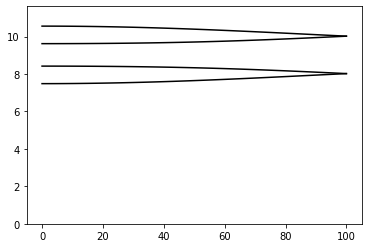

In [3]:
# select a ferromagntic groundstate and external magnetic field in the same direction
h = 0.2
B = [1, 1, 0]
from numpy.linalg import norm

ext_field = h * (B / norm(B))
model.external_field(ext_field)
ground_state = [B / norm(B)] * model.N
model.magnetize(ground_state)

# parameterize a path through k-space and plot the spectrum
ks = np.linspace([0.5, 0.5, 0.0], [0.5, 0.5, 0.5], 101)

spec = Spec(model, ks)

fig, ax = plt.subplots()
for band in spec.E.T:
    ax.plot(band, c='k')
ymin, ymax = ax.get_ylim()
ax.set_ylim([0., ymax])

